# Credit Card Kaggle-Handle Imbalanced Dataset(Over Sampling)

### Context
It is important that credit card companies are ableto recoginze fradulent credit card trancations so that costomers are not charged for items that they did not purchase

### Content
The dataset contains transactions made by credit card in september 2013 by european cardholders.The dataset presents transcations that occurred in two days,where we have 492 fradus out of 284,807 transcations.The dataset is highly unbalanced,the positive class(frauds) accouts for 0.172% of all transactions.

It contain only numerical input variables which are the result of a PCA transformation.Unfortuately,due to confidentiality issues,we cannot provide the original features and more background information about the data.Feature v1,v2....v28 are the principal components obtaine with PCA the only features which have not been transformed with PCA are 'Time'and'Amount'.Feature 'Time' contains the seconds elasped between each transcation and the first transcation in the dataset.The feature 'Amount'is the transcation Amount this feature can be used for example-dependant cost-senstive learning.Feature 'class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio.We recommend measuring the accuracy using the Area Under the Precision-Recall Curve(AUPRC).Confusion matrix accuracy is not meaningful for unbalanced classification.

## Data mining and fraud detection

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED = 42
LABELS = ['Normal','Fradu']

In [2]:
data = pd.read_csv(r"D:\New folder(2)\creditcard.csv\creditcard.csv",sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# create independent and dependent features
columns = data.columns.tolist()
# Filterthe columns to remove data we do not want
columns = [c for c in columns if c not in ['Class']]
# store the variable we are predicting
target = 'Class'
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))
# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


# Exploratory Data Analysis

In [5]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

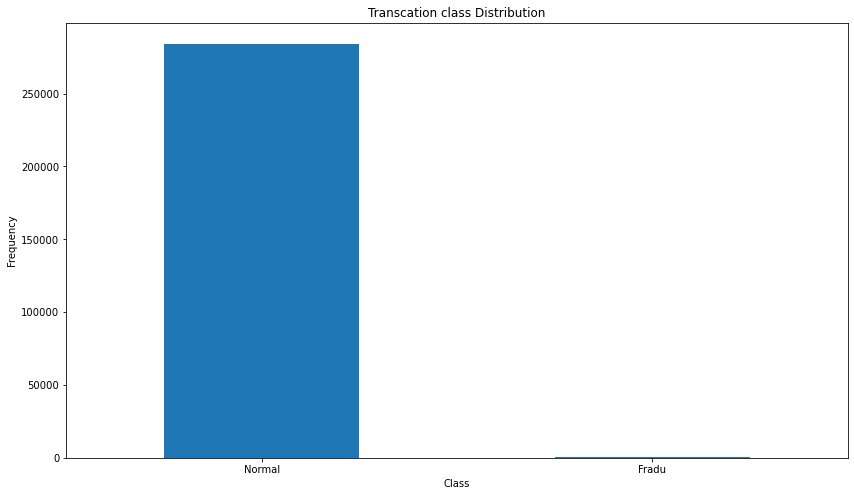

In [6]:
count_classes = pd.value_counts(data['Class'],sort = True)

count_classes.plot(kind = 'bar',rot=0)

plt.title('Transcation class Distribution')

plt.xticks(range(2),LABELS)

plt.xlabel('Class')

plt.ylabel('Frequency')

In [7]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]


In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,Y)


In [ ]:
X_res.shape,y_res.shape

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

In [10]:
# another way of handling the dataset
# RandomOverSample to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [11]:
ratio=0.5
os = RandomOverSampler(ratio)

D:\anaconda\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [12]:
X_train_res,y_train_res = os.fit_resample(X,Y)


In [25]:
X_train_res.shape,y_train_res.shape

((426472, 30), (426472,))

In [13]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 142157})


In [ ]:
# In this example I use SMOTETomek which is a imbalance of imblearn.SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method(SMOTE)
ratio=0.5
os_us = SMOTETomek(ratio)

X_train_res1,y_train_res1 = os_us.fit_resample(X,Y)

D:\anaconda\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
X_train_res1.shape,y_train_res1.shape